# Project Aim: 
# Implement Decision Tree Model to evaluate the decision making based on the feature ratings of a car

## 1. Background: 
### For automobile enthusiasts, it is always a matter of interest when it comes to deciding which car, according to them, is better. The point of debate is usually either one or a combination of features of the car/(s) in question. 
### The following analysis is derived based on the ratings of the major features in the car dataset.

## 2. Motivation: 
### I find it very useful and interesting to know what features impact the evaluation of the cars. At the same time, it will be very important to know that given the evaluation of a certain car, what it should be compared against. This analysis will certainly help define the highest acceptable ratings in a car.

## 3. Audience: 
### This data analysis will be useful for potential car buyers and/or automobile enthusiasts.

## 4. Dataset Source: 
### Car Evaluation Database- https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names
### Creator and Donor - Marko Bohanec and Blaz Zupan

## 5. Algorithm: 
### Decision trees (DTS) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

### 5.1. Reading the dataset and creating column headers

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "CarData.csv"
car_training = pd.read_csv(input_file, header = 0)

In [2]:
car_training.columns = ['Buying Price',
             'Maintenance',
             'Doors',
             'Persons',
             'Lug Boot',
             'Safety',
             'Class']
             

In [3]:
car_cleandataset = car_training.copy()
car_cleandataset.head()

,Buying Price,Maintenance,Doors,Persons,Lug Boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### 5.2. Map vhigh to 0, high to 1, med to 2 and low to 3 for Buying price of the car

In [4]:
d = {'vhigh': 0, 'high': 1, 'med':2, 'low':3} 
car_cleandataset['Buying Price'] = car_cleandataset['Buying Price'].map(d)
car_cleandataset.head()

,Buying Price,Maintenance,Doors,Persons,Lug Boot,Safety,Class
0,0,vhigh,2,2,small,med,unacc
1,0,vhigh,2,2,small,high,unacc
2,0,vhigh,2,2,med,low,unacc
3,0,vhigh,2,2,med,med,unacc
4,0,vhigh,2,2,med,high,unacc


### 5.3. Map vhigh to 0, high to 1, med to 2 and low to 3 for Maintenance of the car

In [5]:
d = {'vhigh': 0, 'high': 1, 'med':2, 'low':3} 
car_cleandataset['Maintenance'] = car_cleandataset['Maintenance'].map(d)

### 5.4. Map small to 0, med to 1, big to 2 car for Lug Boot feature

In [6]:
d = {'small': 0, 'med':1, 'big':2}
car_cleandataset['Lug Boot'] = car_cleandataset['Lug Boot'].map(d)

### 5.5. Map low to 0, med to 1, high to 2 for Safety of the car

In [7]:
d = {'low': 0, 'med':1, 'high':2}
car_cleandataset['Safety'] = car_cleandataset['Safety'].map(d)

In [8]:
car_cleandataset.head()

,Buying Price,Maintenance,Doors,Persons,Lug Boot,Safety,Class
0,0,0,2,2,0,1,unacc
1,0,0,2,2,0,2,unacc
2,0,0,2,2,1,0,unacc
3,0,0,2,2,1,1,unacc
4,0,0,2,2,1,2,unacc


### 5.6. Renaming the Class parameters

In [9]:
car_cleandataset['Class'].replace(to_replace="unacc",value="Unacceptable", inplace=True)
car_cleandataset['Class'].replace(to_replace="acc",value="Acceptable", inplace=True)
car_cleandataset['Class'].replace(to_replace="good",value="Good", inplace=True)
car_cleandataset['Class'].replace(to_replace="vgood",value="Very good", inplace=True)
car_cleandataset.head()

,Buying Price,Maintenance,Doors,Persons,Lug Boot,Safety,Class
0,0,0,2,2,0,1,Unacceptable
1,0,0,2,2,0,2,Unacceptable
2,0,0,2,2,1,0,Unacceptable
3,0,0,2,2,1,1,Unacceptable
4,0,0,2,2,1,2,Unacceptable


In [10]:
car_cleandatasetcopy = car_cleandataset.copy()

In [11]:
car_cleandataset.dtypes

Buying Price     int64
Maintenance      int64
Doors            int64
Persons          int64
Lug Boot         int64
Safety           int64
Class           object
dtype: object

### 5.7. Checking for the list of features

In [12]:
features = list(car_cleandataset.columns[0:6])
features

['Buying Price', 'Maintenance', 'Doors', 'Persons', 'Lug Boot', 'Safety']

In [13]:
type(features)

list

### 5.8. The target feature is Class

In [14]:
y = car_cleandataset["Class"]
X = car_cleandataset[features]

In [15]:
clf = tree.DecisionTreeClassifier()

In [16]:
clf = clf.fit(X,y)

In [17]:
features

['Buying Price', 'Maintenance', 'Doors', 'Persons', 'Lug Boot', 'Safety']

### 5.9. Construct the Decision Tree using the Decision Tree Classifier

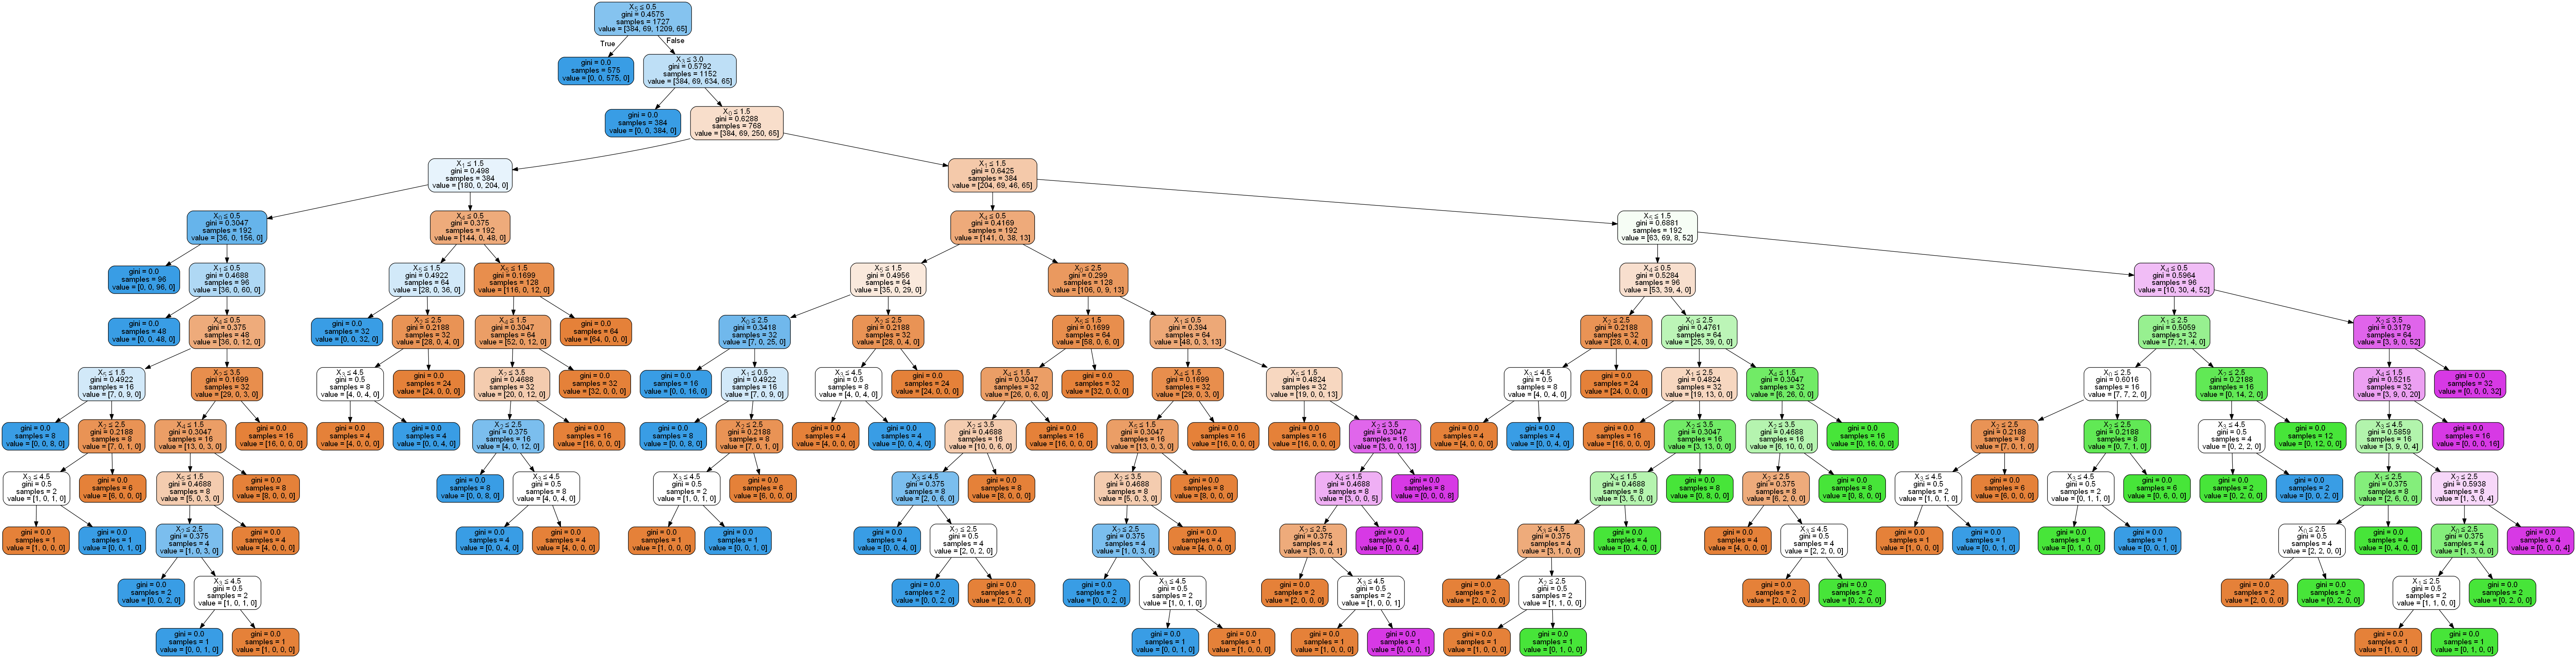

In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [19]:
print (clf.predict([[2, 1, 2, 0, 0, 1]]))

['Unacceptable']


### 5.10. Ensemble Learning: Using a random forest to build 12 decision trees.

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf10TREE = RandomForestClassifier(n_estimators=12)
clf10TREE = clf.fit(X, y)

In [21]:
print (clf10TREE.predict([[3, 2, 1, 0, 0, 1]]))

['Unacceptable']


In [22]:
print (clf10TREE.predict([[3, 2, 5, 2, 2, 2]]))

['Unacceptable']


In [23]:
car_cleandataset.tail(20)

,Buying Price,Maintenance,Doors,Persons,Lug Boot,Safety,Class
1707,3,3,5,2,2,1,Unacceptable
1708,3,3,5,2,2,2,Unacceptable
1709,3,3,5,4,0,0,Unacceptable
1710,3,3,5,4,0,1,Acceptable
1711,3,3,5,4,0,2,Good
1712,3,3,5,4,1,0,Unacceptable
1713,3,3,5,4,1,1,Good
1714,3,3,5,4,1,2,Very good
1715,3,3,5,4,2,0,Unacceptable
1716,3,3,5,4,2,1,Good


### 5.11. Predicting the Class feature based on the combinations of feature ratings in the dataset

In [24]:
print (clf10TREE.predict([[3, 3, 5, 4, 1, 2]]))

['Very good']


In [25]:
print (clf10TREE.predict([[3, 3, 5, 5, 2, 2]]))

['Very good']


In [26]:
print (clf10TREE.predict([[3, 3, 5, 5, 1, 0]]))

['Unacceptable']


In [27]:
print (clf10TREE.predict([[3, 3, 5, 5, 1, 1]]))

['Good']


In [28]:
print (clf10TREE.predict([[3, 3, 5, 5, 0, 1]]))

['Acceptable']


In [29]:
print (clf10TREE.predict([[3, 3, 5, 4, 2, 2]]))


['Very good']


In [30]:
print (clf10TREE.predict([[3, 3, 5, 2, 2, 2]]))

['Unacceptable']


In [31]:
print (clf10TREE.predict([[3, 3, 5, 4, 0, 1]]))

['Acceptable']


In [32]:
print (clf10TREE.predict([[3, 3, 5, 4, 0, 2]]))

['Good']


In [33]:
car_cleandataset.to_csv('CarDataset.csv', index=False)

## 6. Visualization:

#### The intention of this visualization is to provide insights on:
#### 1. The ideal ratings of the features of the cars
#### 2. Impact of the features of the car on the overall rating
#### 3. Best feature rating combinations to achieve the highest acceptable rating - "Very Good" 

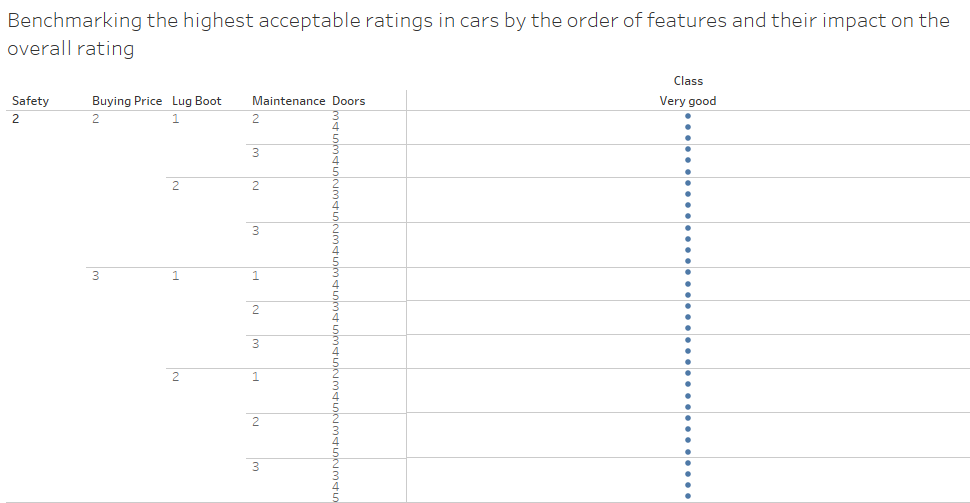

In [34]:
from IPython.display import Image
Image("Features and ratings.png")

## 7. Insights:

### 7.1. Ideal ratings of the features of the car:
#### With the help of this visualization, it is very helpful for the audience to know what the ideal ratings of each of the feature of the car should be. For example, if the Buying Price of the car is 0, it is easy to conclude from this data that the overall rating will not be "Very Good". 

### 7.2. Best feature rating combinations to achieve the highest acceptable rating - "Very Good":
#### Based on the analysis, it is easy to visually understand the impact of all the listed features in this data set for a certain car.
#### A) Safety: Only the cars which are rated '2' (High) achieve the overall rating as "Very Good". 
#### B) Buying Price: The Buying Price can be '2' (Medium) or '3' (Low) to acheive the rating "Very Good".
#### C) Lug Boot: The boot space can be either '1' (Medium) or '2' (Big).
#### D) Maintenance: As long as the Safety, Buying Price and Lug Boot features meet the requirements for the "Very Good" rating, the Maintenance feature rating does not affect the overall rating of the car, unless the buying price is '2' (Medium).
#### E) Doors: The number of doors has no effect on the overall rating of the car.

### 7.3. Impact of the features of the car on the overall rating: 
#### The analysis above shows that the most important feature in the data set is Safety. The Buying Price and Lug Boot are the next important factors. Maintenance is a feature that can be overlooked provided the Buying Price is set to '3' (Low). The number of doors is the least important feature and it does not affect the overall rating in any way.